In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('part1_station_data.csv')
yelp_df = pd.read_csv('part2_yelp_data.csv')
foursquare_df = pd.read_csv('part2_foursquare_data.csv')

In [3]:
merged_df = pd.merge(df, foursquare_df, on=['latitude', 'longitude'], how='left')
merged_df = pd.merge(merged_df, yelp_df, on=['latitude', 'longitude'], how='left', suffixes=('_foursquare', '_yelp'))

merged_df

,latitude,longitude,num_bikes,name_foursquare,category,name_yelp,rating
0,50.961008,6.930710,0,NaN,NaN,NaN,NaN
1,50.926356,6.957092,0,NaN,NaN,NaN,NaN
2,50.938831,6.906270,1,NaN,NaN,NaN,NaN
3,50.972420,6.951578,0,NaN,NaN,NaN,NaN
4,50.935485,6.961159,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
171,50.919935,7.097071,0,NaN,NaN,NaN,NaN
172,50.962241,7.003033,3,NaN,NaN,NaN,NaN
173,50.967114,6.989276,0,NaN,NaN,NaN,NaN
174,50.930053,6.993490,0,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values and calculate the count of missing values in each column
missing_values = merged_df.isnull().sum()

# Print the columns with missing values and their respective counts
print(missing_values)


latitude             0
longitude            0
num_bikes            0
name_foursquare    176
category           176
name_yelp          176
rating             176
dtype: int64


In [5]:
# Create new columns to store rounded latitude and longitude values
df['latitude_rounded'] = df['latitude'].round(3)
df['longitude_rounded'] = df['longitude'].round(3)

yelp_df['latitude_rounded'] = yelp_df['latitude'].round(3)
yelp_df['longitude_rounded'] = yelp_df['longitude'].round(3)

foursquare_df['latitude_rounded'] = foursquare_df['latitude'].round(3)
foursquare_df['longitude_rounded'] = foursquare_df['longitude'].round(3)

# Merge using the new columns
merged_df = pd.merge(df, foursquare_df, left_on=['latitude_rounded', 'longitude_rounded'], right_on=['latitude_rounded', 'longitude_rounded'], how='left')
merged_df = pd.merge(merged_df, yelp_df, left_on=['latitude_rounded', 'longitude_rounded'], right_on=['latitude_rounded', 'longitude_rounded'], how='left', suffixes=('_foursquare', '_yelp'))

merged_df


,latitude_x,longitude_x,num_bikes,latitude_rounded,longitude_rounded,name_foursquare,latitude_y,longitude_y,category,name_yelp,latitude,longitude,rating
0,50.961008,6.930710,0,50.961,6.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.926356,6.957092,0,50.926,6.957,Toscanini,50.925652,6.956911,Pizzeria,Toscanini,50.92562,6.95713,4.5
2,50.926356,6.957092,0,50.926,6.957,Toscanini,50.925652,6.956911,Pizzeria,Toscanini,50.92562,6.95713,4.5
3,50.926356,6.957092,0,50.926,6.957,Toscanini,50.925652,6.956911,Pizzeria,Toscanini,50.92562,6.95713,4.5
4,50.926356,6.957092,0,50.926,6.957,Toscanini,50.925652,6.956911,Pizzeria,Toscanini,50.92562,6.95713,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,50.919935,7.097071,0,50.920,7.097,Café am Königsforst,50.920360,7.096805,Café,Café am Königsforst,50.92030,7.09661,3.8
4609,50.962241,7.003033,3,50.962,7.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4610,50.967114,6.989276,0,50.967,6.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4611,50.930053,6.993490,0,50.930,6.993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
columns_to_keep = [
    'latitude_rounded', 'longitude_rounded', 'num_bikes', 
    'name_foursquare', 'category', 'name_yelp', 'rating'
]

merged_df = merged_df[columns_to_keep]

merged_df.head()

,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
0,50.961,6.931,0,NaN,NaN,NaN,NaN
1,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
2,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
3,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
4,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5


In [7]:
# Check for missing values and calculate the count of missing values in each column
missing_values = merged_df.isnull().sum()

# Print the columns with missing values and their respective counts
print(missing_values)


latitude_rounded       0
longitude_rounded      0
num_bikes              0
name_foursquare      204
category             204
name_yelp            196
rating               196
dtype: int64


In [8]:
merged_df = merged_df.dropna()


merged_df


,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
1,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
2,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
3,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
4,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
5,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
...,...,...,...,...,...,...,...
4604,50.920,7.097,0,Café am Königsforst,Café,Café am Königsforst,3.8
4605,50.920,7.097,0,Café am Königsforst,Café,Schwalbennest,3.3
4606,50.920,7.097,0,Café am Königsforst,Café,Café am Königsforst,3.8
4607,50.920,7.097,0,Café am Königsforst,Café,Schwalbennest,3.3


In [9]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

# Check the processed data
merged_df.head()


,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
0,50.926,6.957,0,Toscanini,Pizzeria,Toscanini,4.5
1,50.935,6.961,0,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.1
2,50.922,6.960,0,Lalezar,Turkish Restaurant,"FRÜH ""Em Veedel""",4.1
3,50.922,6.960,0,Früh em Veedel,Rhenisch Restaurant,"FRÜH ""Em Veedel""",4.1
4,50.922,6.960,0,Restaurant und Eiscafe Da Franco,Ice Cream Parlor,"FRÜH ""Em Veedel""",4.1


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude_rounded   63 non-null     float64
 1   longitude_rounded  63 non-null     float64
 2   num_bikes          63 non-null     int64  
 3   name_foursquare    63 non-null     object 
 4   category           63 non-null     object 
 5   name_yelp          63 non-null     object 
 6   rating             63 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.6+ KB


In [11]:
merged_df.to_csv('part3_merged_data.csv', index=False)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

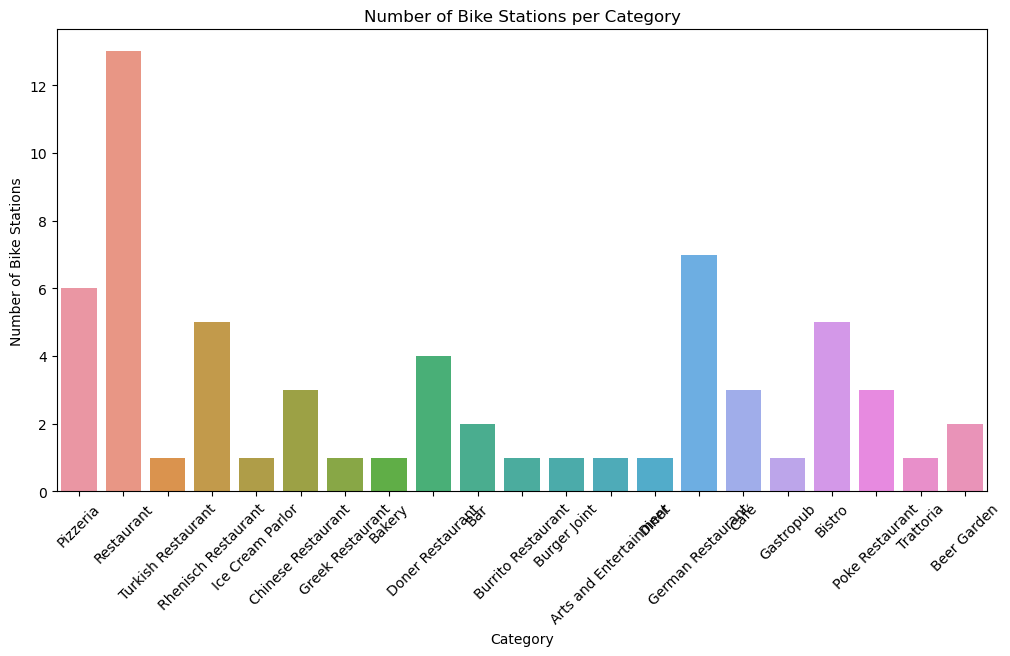

In [13]:
# Mapping the number of bicycle stations in each category
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=merged_df)
plt.title('Number of Bike Stations per Category')
plt.xlabel('Category')
plt.ylabel('Number of Bike Stations')
plt.xticks(rotation=45)
plt.show()

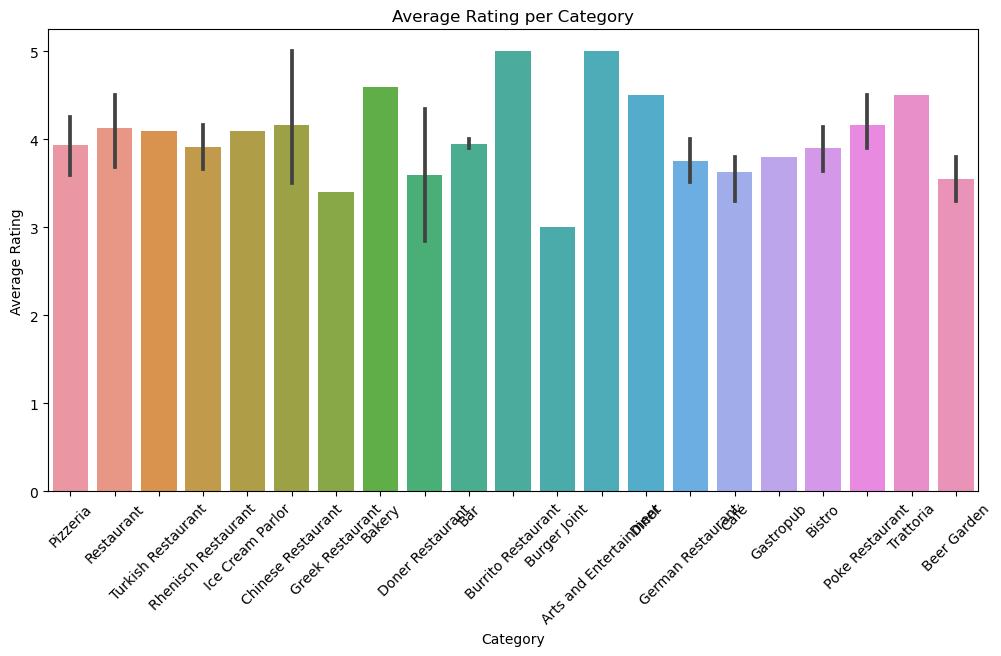

In [14]:
#Plotting average ratings for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='rating', data=merged_df)
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

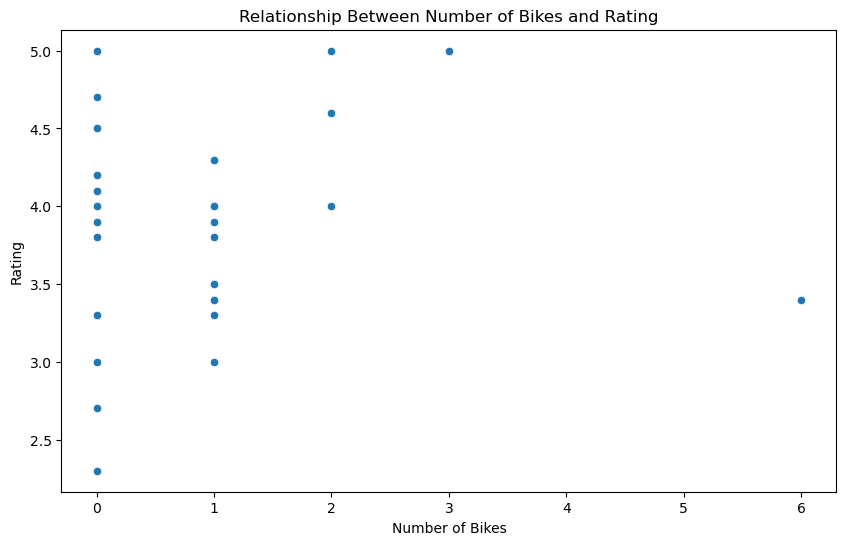

In [15]:
#Relationship between number of bicycle stations and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_bikes', y='rating', data=merged_df)
plt.title('Relationship Between Number of Bikes and Rating')
plt.xlabel('Number of Bikes')
plt.ylabel('Rating')
plt.show()

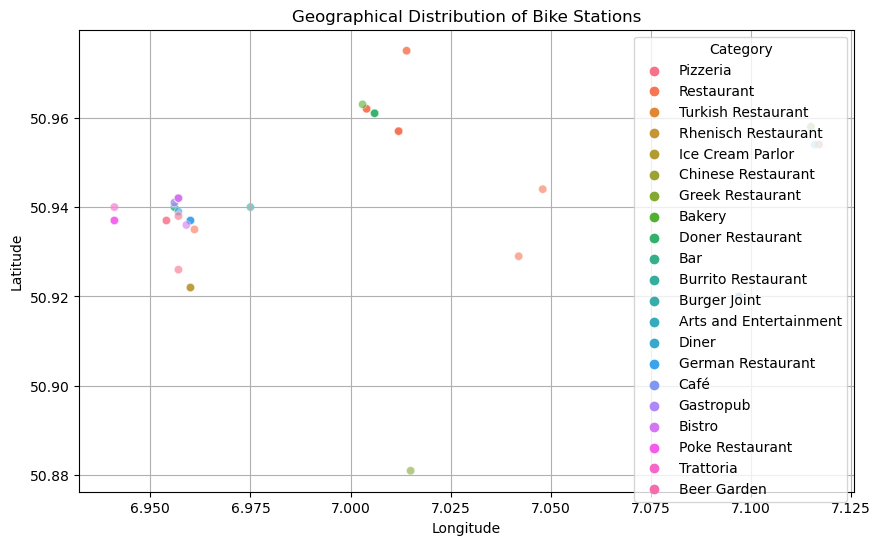

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='longitude_rounded', y='latitude_rounded', data=merged_df, hue='category', alpha=0.6)

plt.title('Geographical Distribution of Bike Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [24]:
import sqlite3
import os


# Create an SQLite database
conn = sqlite3.connect('desktop\lighthouse lab\PYTHON-PROJECT-2\data\my_database.db')

# Store the DataFrame in the database
merged_df.to_sql('bike_poi_data', conn, if_exists='replace', index=False)

# Verify the data
# Query data from the database
test_df = pd.read_sql_query("SELECT * FROM bike_poi_data", conn)
print(test_df.head())

# Close the database connection
conn.close()


   latitude_rounded  longitude_rounded  num_bikes  \
0            50.926              6.957          0   
1            50.935              6.961          0   
2            50.922              6.960          0   
3            50.922              6.960          0   
4            50.922              6.960          0   

                      name_foursquare             category         name_yelp  \
0                           Toscanini             Pizzeria         Toscanini   
1  Brauerei zur Malzmühle, Gaststätte           Restaurant       HÖHNERStall   
2                             Lalezar   Turkish Restaurant  FRÜH "Em Veedel"   
3                      Früh em Veedel  Rhenisch Restaurant  FRÜH "Em Veedel"   
4    Restaurant und Eiscafe Da Franco     Ice Cream Parlor  FRÜH "Em Veedel"   

   rating  
0     4.5  
1     4.1  
2     4.1  
3     4.1  
4     4.1  
